In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import iso

## Create fake data

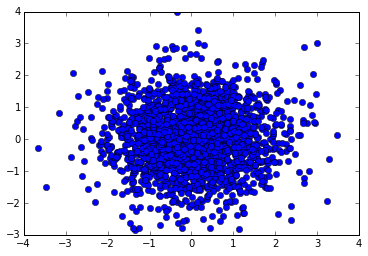

In [2]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 2000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3
y[0]=3
X=np.array([x,y]).T
plt.plot(x,y,'bo')

## Create Forest

In [24]:
F = iso.iForest(X,ntrees=300, sample_size=256)

## Computing path for All objects

In [27]:
S=F.compute_paths(X_in=X)

## sorting by anomaly, plotting 10 top anomalies in red

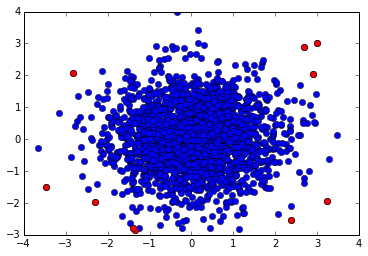

In [28]:
ss=np.argsort(S)
plt.plot(x,y,'bo')
plt.plot(x[ss[-10:]],y[ss[-10:]],'ro')

## Another example, sin function with gaussian error

In [54]:
N = 4000
x2 = np.random.rand(N)
y2 = np.sin(x2*10.) + np.random.randn(N)/2.

## Add outliers by hand

(0, 1)

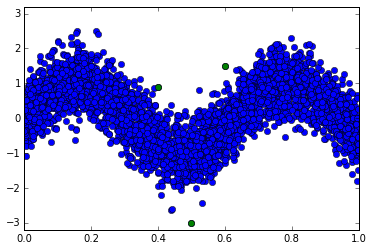

In [55]:
x2[0]=0.4; y2[0]=0.9
x2[1]=0.6; y2[1]=1.5
x2[2]=0.5; y2[2]=-3.
plt.plot(x2,y2,'bo')
plt.plot(x2[:3],y2[:3],'go')
plt.ylim(-3.2,3.2)
plt.xlim(0,1)

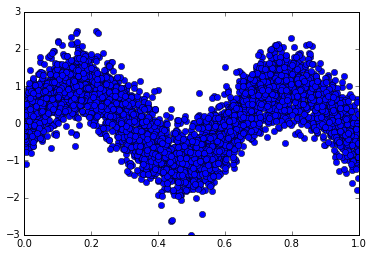

In [56]:
plt.plot(x2,y2,'bo')
X2=np.array([x2,y2]).T

In [57]:
F2 = iso.iForest(X2,ntrees=500, sample_size=512)

In [58]:
S2=F2.compute_paths(X_in=X2)

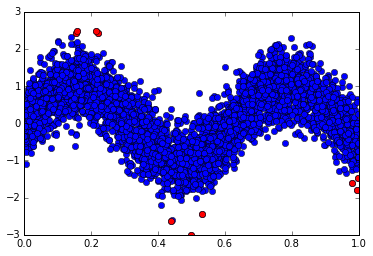

In [59]:
ss=np.argsort(S2)
plt.plot(x2,y2,'bo')
plt.plot(x2[ss[-10:]],y2[ss[-10:]],'ro')